In [2]:
import pandas as pd
import joblib
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score

In [3]:
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
x_house, y_house = fetch_california_housing(return_X_y=True,as_frame=True)

In [5]:
x_house['avgbedroomsperrooms'] = x_house['AveBedrms']/x_house['AveRooms']

In [6]:
x_house.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,avgbedroomsperrooms
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,0.213075
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,0.058023
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.100000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,0.175426
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,0.203181
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,0.239834
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,1.000000


In [7]:
x_train, x_test, y_train, y_test = train_test_split( x_house, y_house, test_size=0.3, random_state=42)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


features_to_transform = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
                         'AveOccup', 'Latitude', 'Longitude', 'avgbedroomsperrooms']


linear_regression = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)
# Definindo os passos que ocorreram pra a transformação
transformer = Pipeline(
    steps=[("standard_scaler", StandardScaler())]
)

# Definindo em quais colunas a transformação será aplicada
preprocessor = ColumnTransformer(
    transformers=[
        ("std", transformer, features_to_transform),
    ]
)

# Criando Pipeline
linear_regressor = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)

random_forest = Pipeline(
    steps=[("model", RandomForestRegressor())]
)

In [9]:
def select_best_model(
    models: list, X:pd.DataFrame, y:pd.DataFrame, cv: int=3, scoring: str ='r2') -> Pipeline:
    scores = []
    for model in models:
        scores.append(
            cross_val_score(model,x_train,y_train, cv=cv, scoring=scoring).mean()
        )
    best_model_position = np.array(scores).argmax()
    return models[best_model_position]

In [10]:
modelo = select_best_model([linear_regressor,random_forest],x_train,y_train)

In [11]:
modelo

Pipeline(steps=[('model', RandomForestRegressor())])

In [12]:
from matplotlib import pyplot as plt
modelo.fit(x_train,y_train)
y_pred = modelo.predict(x_test)
print(f'O score é de {modelo.score(x_test,y_test):.3f}')

O score é de 0.805


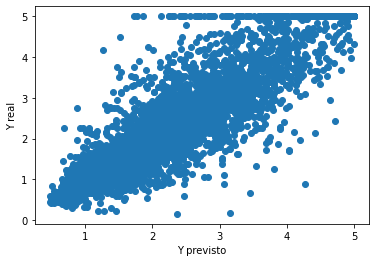

In [13]:
plt.scatter(y_pred,y_test)
plt.xlabel('Y previsto')
plt.ylabel('Y real')
plt.show()

In [17]:
joblib.dump(modelo, '../modelo.gzip', compress='gzip')

FileNotFoundError: [Errno 2] No such file or directory: '../HerokuAPI/src/model/modelo.gzip'

In [15]:
modelo = joblib.load('../modelo.gzip')

In [16]:
modelo.predict(x_test.iloc[:1,:])

array([0.4905999])